# HW3 | EDA (Exploratory Data Analysis)

## 1. Hypothesis forming

In [11]:
pwd()

'/Users/sun/Desktop/ds-class-intro/pandas_intro/data'

In [17]:
cd /Users/sun/Desktop/ds-class-intro/pandas_intro/data

/Users/sun/Desktop/ds-class-intro/pandas_intro/data


## 2. Data Wrangling

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

In [20]:
for year in range(2015, 2020):
    df = pd.read_csv(f'world-happiness/{year}.csv')
    print(year, len(df.columns), df.columns)

2015 12 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')
2016 13 Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
2017 12 Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')
2018 9 Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Health

In [21]:
import datetime
today = datetime.datetime.today() 
print(f"{today:%B %d, %Y}") 

May 15, 2020


In [22]:
rename_dict = {'Overall rank':'Rank',
               'Happiness Rank':'Rank',
               'Happiness.Rank':'Rank',
               'Happiness Score':'Score',
               'Happiness.Score':'Score',
               'Country or region':'Country',
               'Economy..GDP.per.Capita.':'GDP_PC',
               'GDP per capita':'GDP_PC',
               'Economy (GDP per Capita)':'GDP_PC',
               'Social support':'Family',
               'Health (Life Expectancy)':'Health',
               'Healthy life expectancy':'Health',
               'Health..Life.Expectancy.':'Health',
               'Freedom to make life choices':'Freedom',
               'Trust (Government Corruption)':'Trust',
               'Trust..Government.Corruption.':'Trust',
               'Perceptions of corruption':'Trust',
               'Dystopia Residual':'Dystopia',
               'Dystopia.Residual':'Dystopia'
              }

In [23]:
df_list = []

for year in range(2015, 2020):
    df = pd.read_csv(f'world-happiness/{year}.csv')
    df.rename(columns=rename_dict, inplace=True)
    df['year'] = int(year)
    df_list.append(df)
happy = pd.concat(df_list)
happy

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,NaN,152,3.334,NaN,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019,NaN,NaN,NaN,NaN
152,Tanzania,NaN,153,3.231,NaN,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019,NaN,NaN,NaN,NaN
153,Afghanistan,NaN,154,3.203,NaN,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019,NaN,NaN,NaN,NaN
154,Central African Republic,NaN,155,3.083,NaN,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019,NaN,NaN,NaN,NaN


## 3. Data quality Assessing

In [24]:
happy.sort_values(['Country','year'], inplace=True)
happy.groupby('year')['Country'].count()

year
2015    158
2016    157
2017    155
2018    156
2019    156
Name: Country, dtype: int64

In [25]:
year_availability = happy.groupby(['Country','year'])['Country'].size().unstack()
year_availability[year_availability.isnull().any(axis=1)]

year,2015,2016,2017,2018,2019
Country,,,,,
Angola,1.0,1.0,1.0,1.0,NaN
Belize,NaN,1.0,1.0,1.0,NaN
Central African Republic,1.0,NaN,1.0,1.0,1.0
Comoros,1.0,1.0,NaN,NaN,1.0
Djibouti,1.0,NaN,NaN,NaN,NaN
Gambia,NaN,NaN,NaN,NaN,1.0
Hong Kong,1.0,1.0,NaN,1.0,1.0
"Hong Kong S.A.R., China",NaN,NaN,1.0,NaN,NaN
Laos,1.0,1.0,NaN,1.0,1.0


In [26]:
country_dict = {
    'Hong Kong S.A.R., China':'Hong Kong',
    'Northern Cyprus':'North Cyprus',
    'North Macedonia':'Macedonia',
    'Somaliland region':'Somaliland Region',
    'Taiwan Province of China':'Taiwan',
    'Trinidad & Tobago':'Trinidad and Tobago'
}

In [27]:
happy['Country_mapped'] = happy['Country'].map(country_dict).fillna(happy['Country'])

In [28]:
year_availability = happy.groupby(['Country_mapped','year'])['Country_mapped'].size().unstack()
year_availability[year_availability.isnull().any(axis=1)]

year,2015,2016,2017,2018,2019
Country_mapped,,,,,
Angola,1.0,1.0,1.0,1.0,NaN
Belize,NaN,1.0,1.0,1.0,NaN
Central African Republic,1.0,NaN,1.0,1.0,1.0
Comoros,1.0,1.0,NaN,NaN,1.0
Djibouti,1.0,NaN,NaN,NaN,NaN
Gambia,NaN,NaN,NaN,NaN,1.0
Laos,1.0,1.0,NaN,1.0,1.0
Lesotho,1.0,NaN,1.0,1.0,1.0
Mozambique,1.0,NaN,1.0,1.0,1.0


In [29]:
happy.isna().mean()

Country                      0.000000
Region                       0.597187
Rank                         0.000000
Score                        0.000000
Standard Error               0.797954
GDP_PC                       0.000000
Family                       0.000000
Health                       0.000000
Freedom                      0.000000
Trust                        0.001279
Generosity                   0.000000
Dystopia                     0.398977
year                         0.000000
Lower Confidence Interval    0.799233
Upper Confidence Interval    0.799233
Whisker.high                 0.801790
Whisker.low                  0.801790
Country_mapped               0.000000
dtype: float64

In [30]:
happy

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Country_mapped
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,2015,NaN,NaN,NaN,NaN,Afghanistan
153,Afghanistan,Southern Asia,154,3.360,NaN,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,2016,3.288,3.432,NaN,NaN,Afghanistan
140,Afghanistan,NaN,141,3.794,NaN,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,2017,NaN,NaN,3.873661,3.714338,Afghanistan
144,Afghanistan,NaN,145,3.632,NaN,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN,2018,NaN,NaN,NaN,NaN,Afghanistan
153,Afghanistan,NaN,154,3.203,NaN,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,2019,NaN,NaN,NaN,NaN,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Zimbabwe,Sub-Saharan Africa,115,4.610,0.04290,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910,2015,NaN,NaN,NaN,NaN,Zimbabwe
130,Zimbabwe,Sub-Saharan Africa,131,4.193,NaN,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700,2016,4.101,4.285,NaN,NaN,Zimbabwe
137,Zimbabwe,NaN,138,3.875,NaN,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970,2017,NaN,NaN,3.978700,3.771300,Zimbabwe
143,Zimbabwe,NaN,144,3.692,NaN,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN,2018,NaN,NaN,NaN,NaN,Zimbabwe


In [31]:
df_2015 = pd.read_csv('world-happiness/2015.csv')
df_2016 = pd.read_csv('world-happiness/2016.csv')

In [32]:
region_2015 = dict(zip(df_2015['Country'], df_2015['Region']))

# alternative way to get mapping dict
# region_dict2 = df[['Country','Region']].set_index('Country').T.to_dict('records')[0]
# region_2015 == region_dict2
region_2016 = dict(zip(df_2016['Country'], df_2016['Region']))

# combine two year's mapping dictionary
region = {**region_2015, **region_2016}
# alternative way to combine dicts
# region_dict2 = region_2015.copy()
# region_dict2.update(region_2016)
# region == region_dict2

In [33]:
happy['Region'] = happy['Country'].map(region).fillna(happy['Country_mapped'].map(region))

In [34]:
happy[happy['Region'].isna()]

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Country_mapped
119,Gambia,NaN,120,4.516,NaN,0.308,0.939,0.428,0.382,0.167,0.269,NaN,2019,NaN,NaN,NaN,NaN,Gambia


In [35]:
happy[happy['Country_mapped']=='Gambia']

,Country,Region,Rank,Score,Standard Error,GDP_PC,Family,Health,Freedom,Trust,Generosity,Dystopia,year,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Country_mapped
119,Gambia,NaN,120,4.516,NaN,0.308,0.939,0.428,0.382,0.167,0.269,NaN,2019,NaN,NaN,NaN,NaN,Gambia


In [36]:
happy['Region'].value_counts()

Sub-Saharan Africa                 195
Central and Eastern Europe         145
Latin America and Caribbean        111
Western Europe                     105
Middle East and Northern Africa     96
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        30
North America                       10
Australia and New Zealand           10
Name: Region, dtype: int64

In [37]:
# save processed data
cols_to_keep = ['Country_mapped', 'Region', 'year', 
                'Rank', 'Score', 'GDP_PC', 'Family', 'Health',
                'Freedom', 'Trust', 'Generosity', 'Dystopia']
happy_final = happy[cols_to_keep].copy()
happy_final.columns = happy_final.columns.str.lower()
happy_final.to_csv('world-happiness/combined_hw.csv', index=False)

## 4. Data profiling

In [8]:
!conda install -c conda-forge pandas-profiling

Solving environment: done

# All requested packages already installed.



In [45]:
from pandas_profiling import ProfileReport
import pandas as pd

In [49]:
profile = ProfileReport(happy, title='Pandas Profiling Report', 
                        html={'style':{'full_width':True}})

TypeError: _plot_histogram() got an unexpected keyword argument 'title'

In [ ]:
profile.to_widgets()

In [46]:
hp = happy_final[happy_final['country_mapped'].isin(['China','Japan','Switzerland','Ethiopia','Brazil','Thailand'])]
hp1 = hp.rename(columns={'country_mapped':'country'})
hp1 = hp1.sort_values(by=['country'])
hp1

,country,region,year,rank,score,gdp_pc,family,health,freedom,trust,generosity,dystopia
15,Brazil,Latin America and Caribbean,2015,16,6.983,0.981240,1.232870,0.697020,0.490490,0.175210,0.145740,3.260010
16,Brazil,Latin America and Caribbean,2016,17,6.952,1.087540,1.039380,0.614150,0.404250,0.141660,0.157760,3.507330
21,Brazil,Latin America and Caribbean,2017,22,6.635,1.107353,1.431306,0.616552,0.437454,0.111093,0.162350,2.769267
27,Brazil,Latin America and Caribbean,2018,28,6.419,0.986000,1.474000,0.675000,0.493000,0.088000,0.110000,NaN
31,Brazil,Latin America and Caribbean,2019,32,6.300,1.004000,1.439000,0.802000,0.390000,0.086000,0.099000,NaN
83,China,Eastern Asia,2015,84,5.140,0.890120,0.946750,0.816580,0.516970,0.027810,0.081850,1.860400
82,China,Eastern Asia,2016,83,5.245,1.027800,0.793810,0.735610,0.440120,0.027450,0.049590,2.170870
78,China,Eastern Asia,2017,79,5.273,1.081166,1.160837,0.741416,0.472788,0.022794,0.028807,1.764939
85,China,Eastern Asia,2018,86,5.246,0.989000,1.142000,0.799000,0.597000,0.103000,0.029000,NaN
92,China,Eastern Asia,2019,93,5.191,1.029000,1.125000,0.893000,0.521000,0.100000,0.058000,NaN


## 5. variables exploring

In [74]:
x = features = ['gdp_pc','family','health','freedom','generosity','trust','dystopia']
y = targets = ['score']

#for year in range(2015, 2020):
    #happy_{year} = happy_final[happy_final['year']=={year}].copy()

happy_2016 = happy_final[happy_final['year']==2016].copy()

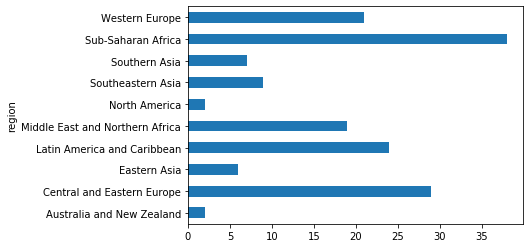

In [48]:
happy_2016.groupby('region')['country_mapped'].count().plot(kind='barh')

In [49]:
happy_2016.groupby('region')[features+targets].describe().T

region        Australia and New Zealand  Central and Eastern Europe  \
gdp_pc count                   2.000000                   29.000000   
       mean                    1.402545                    1.047537   
       std                     0.059234                    0.226929   
       min                     1.360660                    0.488350   
       25%                     1.381602                    0.901450   
...                                 ...                         ...   
score  min                     7.313000                    4.217000   
       25%                     7.318250                    5.145000   
       50%                     7.323500                    5.488000   
       75%                     7.328750                    5.813000   
       max                     7.334000                    6.596000   

region        Eastern Asia  Latin America and Caribbean  \
gdp_pc count      6.000000                    24.000000   
       mean       1.277312                     0.993410   
       std        0.215326                     0.225650   
       min        0.988530                     0.340970   
       25%        1.110720                     0.875545   
...                    ...                          ...   
score  min        4.907000                     4.028000   
       25%        5.298250                     5.802250   
       50%        5.646500                     6.126000   
       75%        5.899500                     6.662750   
       max        6.379000                     7.087000   

region        Middle East and Northern Africa  North America  \
gdp_pc count                        19.000000       2.000000   
       mean                          1.139323       1.474055   
       std                           0.334531       0.047949   
       min                           0.579390       1.440150   
       25%                           0.965595       1.457102   
...                                       ...            ...   
score  min                           3.069000       7.104000   
       25%                           4.783500       7.179000   
       50%                           5.303000       7.254000   
       75%                           6.297000       7.329000   
       max                           7.267000       7.404000   

region        Southeastern Asia  Southern Asia  Sub-Saharan Africa  \
gdp_pc count           9.000000       7.000000           38.000000   
       mean            0.896381       0.660671            0.474321   
       std             0.392066       0.215739            0.310694   
       min             0.341120       0.382270            0.000000   
       25%             0.680420       0.494015            0.279963   
...                         ...            ...                 ...   
score  min             3.907000       3.360000            2.905000   
       25%             4.876000       4.409500            3.745000   
       50%             5.279000       4.643000            4.130000   
       75%             6.005000       4.962500            4.433250   
       max             6.739000       5.196000            5.648000   

region        Western Europe  
gdp_pc count       21.000000  
       mean         1.417056  
       std          0.104509  
       min          1.248860  
       25%          1.342530  
...                      ...  
score  min          5.033000  
       25%          6.361000  
       50%          6.907000  
       75%          7.339000  
       max          7.526000  

[64 rows x 10 columns]

In [50]:
happy_means = happy_2016.groupby('region')[features+targets].mean()
happy_means

,gdp_pc,family,health,freedom,generosity,trust,dystopia,score
region,,,,,,,,
Australia and New Zealand,1.402545,1.138770,0.841080,0.574920,0.484040,0.371175,2.511015,7.323500
Central and Eastern Europe,1.047537,0.861855,0.631592,0.300528,0.170898,0.088072,2.270222,5.370690
Eastern Asia,1.277312,0.910428,0.806680,0.387282,0.223563,0.118347,1.900682,5.624167
Latin America and Caribbean,0.993410,0.898432,0.612703,0.426646,0.208428,0.106016,2.856078,6.101750
Middle East and Northern Africa,1.139323,0.695644,0.616438,0.309769,0.186749,0.161526,2.276677,5.386053
North America,1.474055,1.071960,0.803300,0.527665,0.429555,0.230985,2.716335,7.254000
Southeastern Asia,0.896381,0.791756,0.561369,0.490123,0.446150,0.148104,2.004910,5.338889
Southern Asia,0.660671,0.480694,0.453670,0.350026,0.343281,0.104899,2.170101,4.563286
Sub-Saharan Africa,0.474321,0.593656,0.239872,0.315424,0.226348,0.120379,2.166359,4.136421


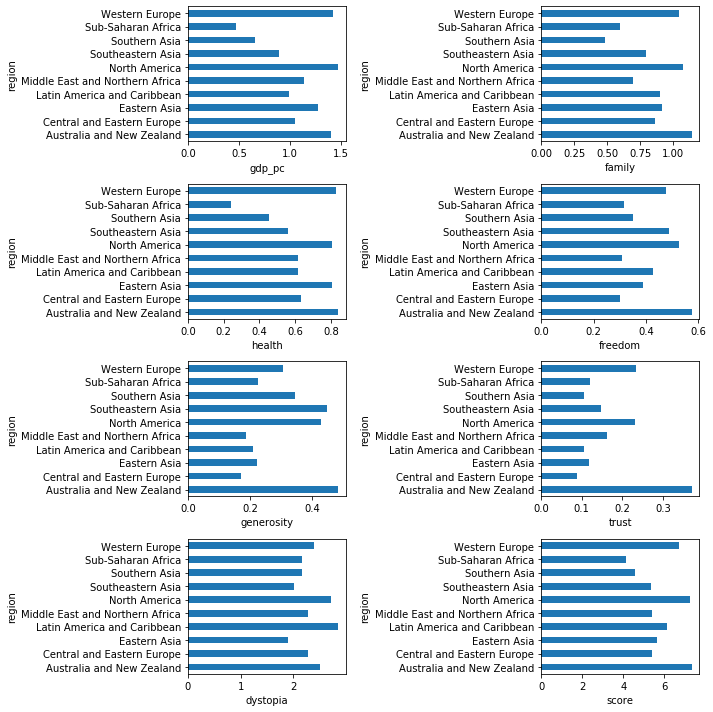

In [55]:
fig, axs = plt.subplots(4, 2, figsize=(10,10))
for i, ax in enumerate(axs.flat):
    try:
        happy_means.loc[:, happy_means.columns[i]].plot(kind='barh', ax=ax)
        ax.set(xlabel=happy_means.columns[i])
    except:
        pass
fig.tight_layout()

[Text(0, 0, 'Southern Asia'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'Middle East and Northern Africa'),
 Text(0, 0, 'Sub-Saharan Africa'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Australia and New Zealand'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Southeastern Asia'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Eastern Asia')]

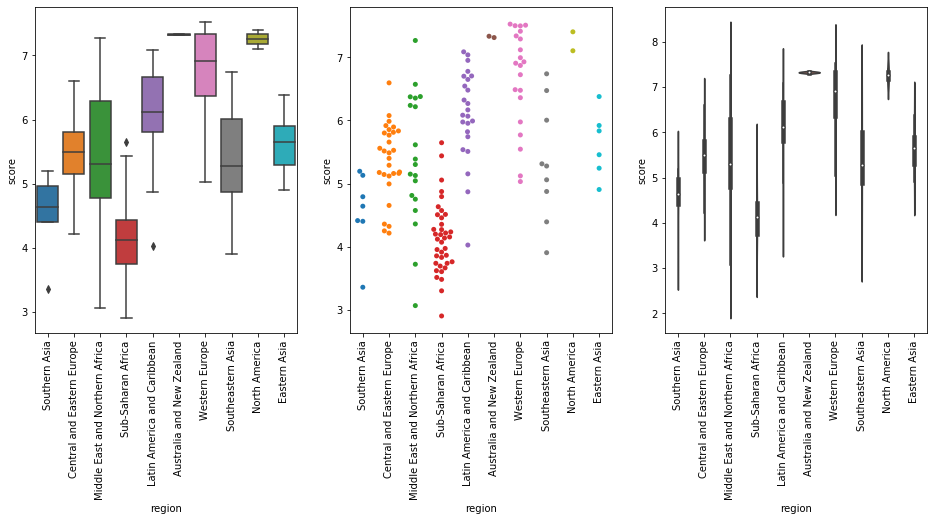

In [57]:
# plot univariate distrition for happiness score

fig, axes = plt.subplots(1, 3, figsize=(16,6))

ax = sns.boxplot(x="region", y="score", data=happy_2016, ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.swarmplot(x="region", y="score", data=happy_2016, ax=axes[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.violinplot(x="region", y="score", data=happy_2016, ax=axes[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

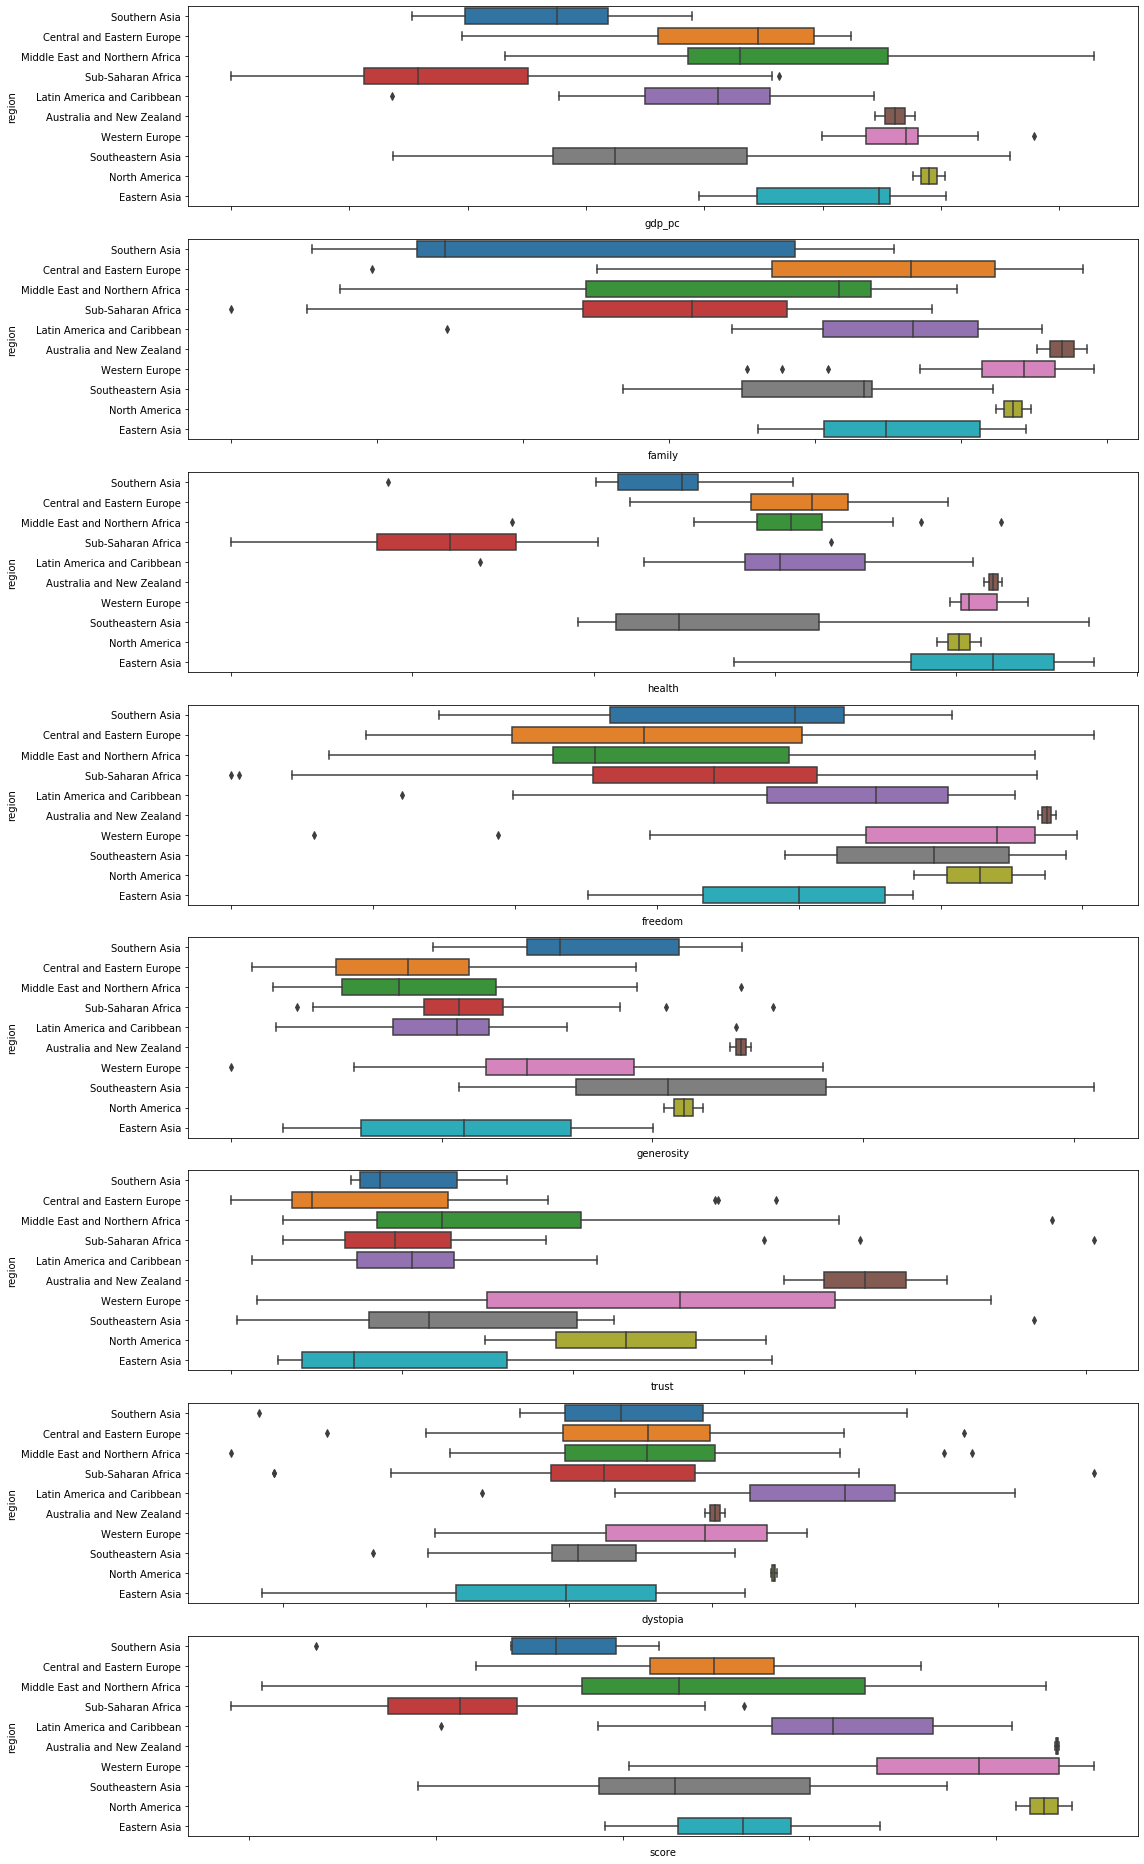

In [62]:
# plot boxplot for all variables

fig, axs = plt.subplots(8, 1, figsize=(16,26))
cols = features+targets
for i, ax in enumerate(axs.flat):
    try:
        ax = sns.boxplot(x=cols[i], y='region', data=happy_2016, ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    except:
        pass
fig.tight_layout()

## 6. Relationship between each variable and our targetting variable

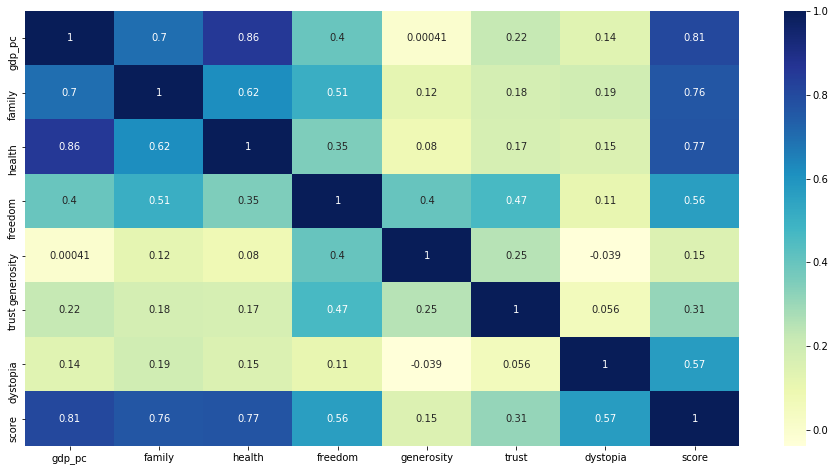

In [70]:
spearman_cormatrix = happy_2016[features+targets].corr(method='spearman')

plt.figure(figsize=(16, 8))
sns.heatmap(spearman_cormatrix, annot=True, cmap="YlGnBu")

## 7. Interaction between variables

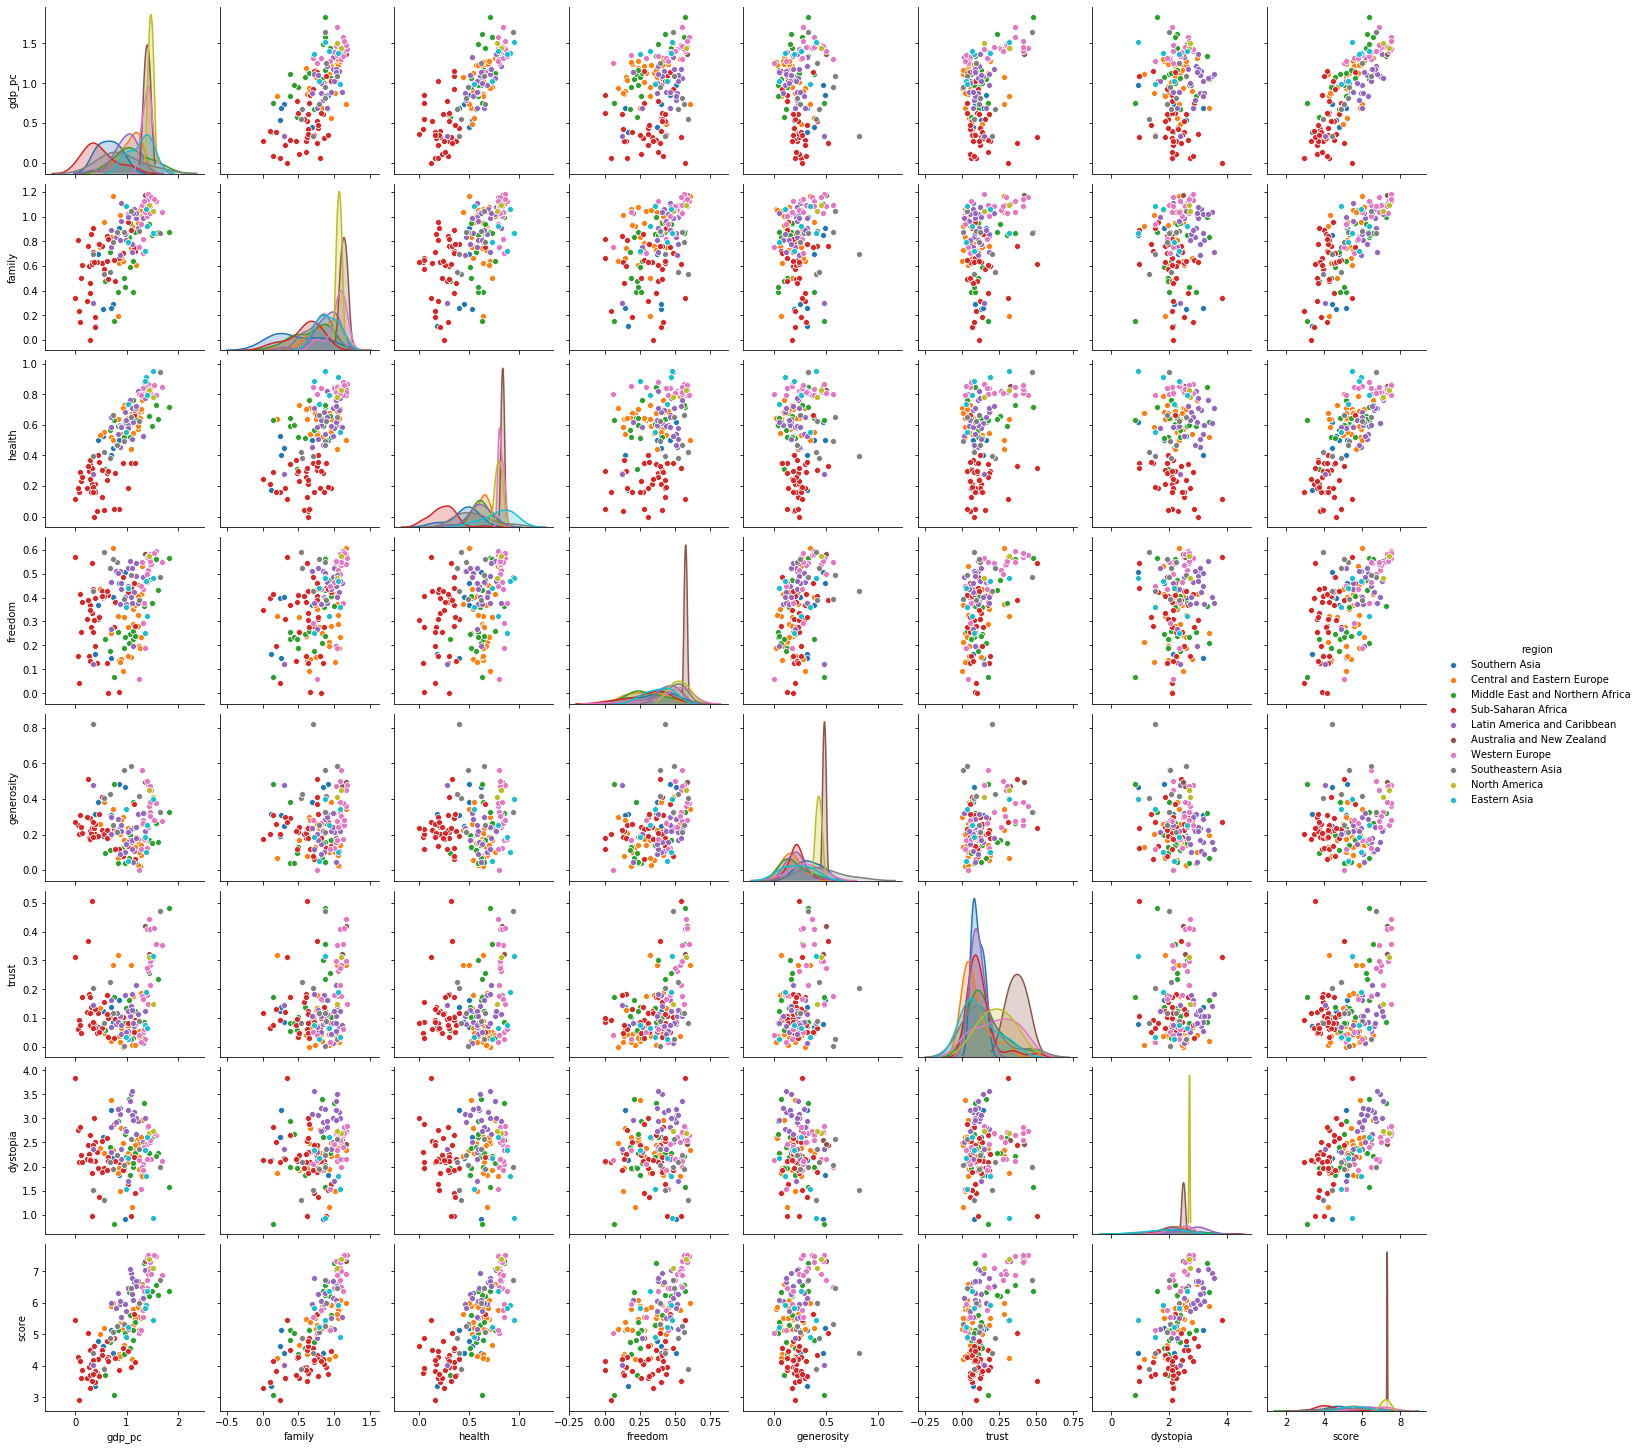

In [69]:
sns.pairplot(happy_2016[features+targets+['region']], hue='region')

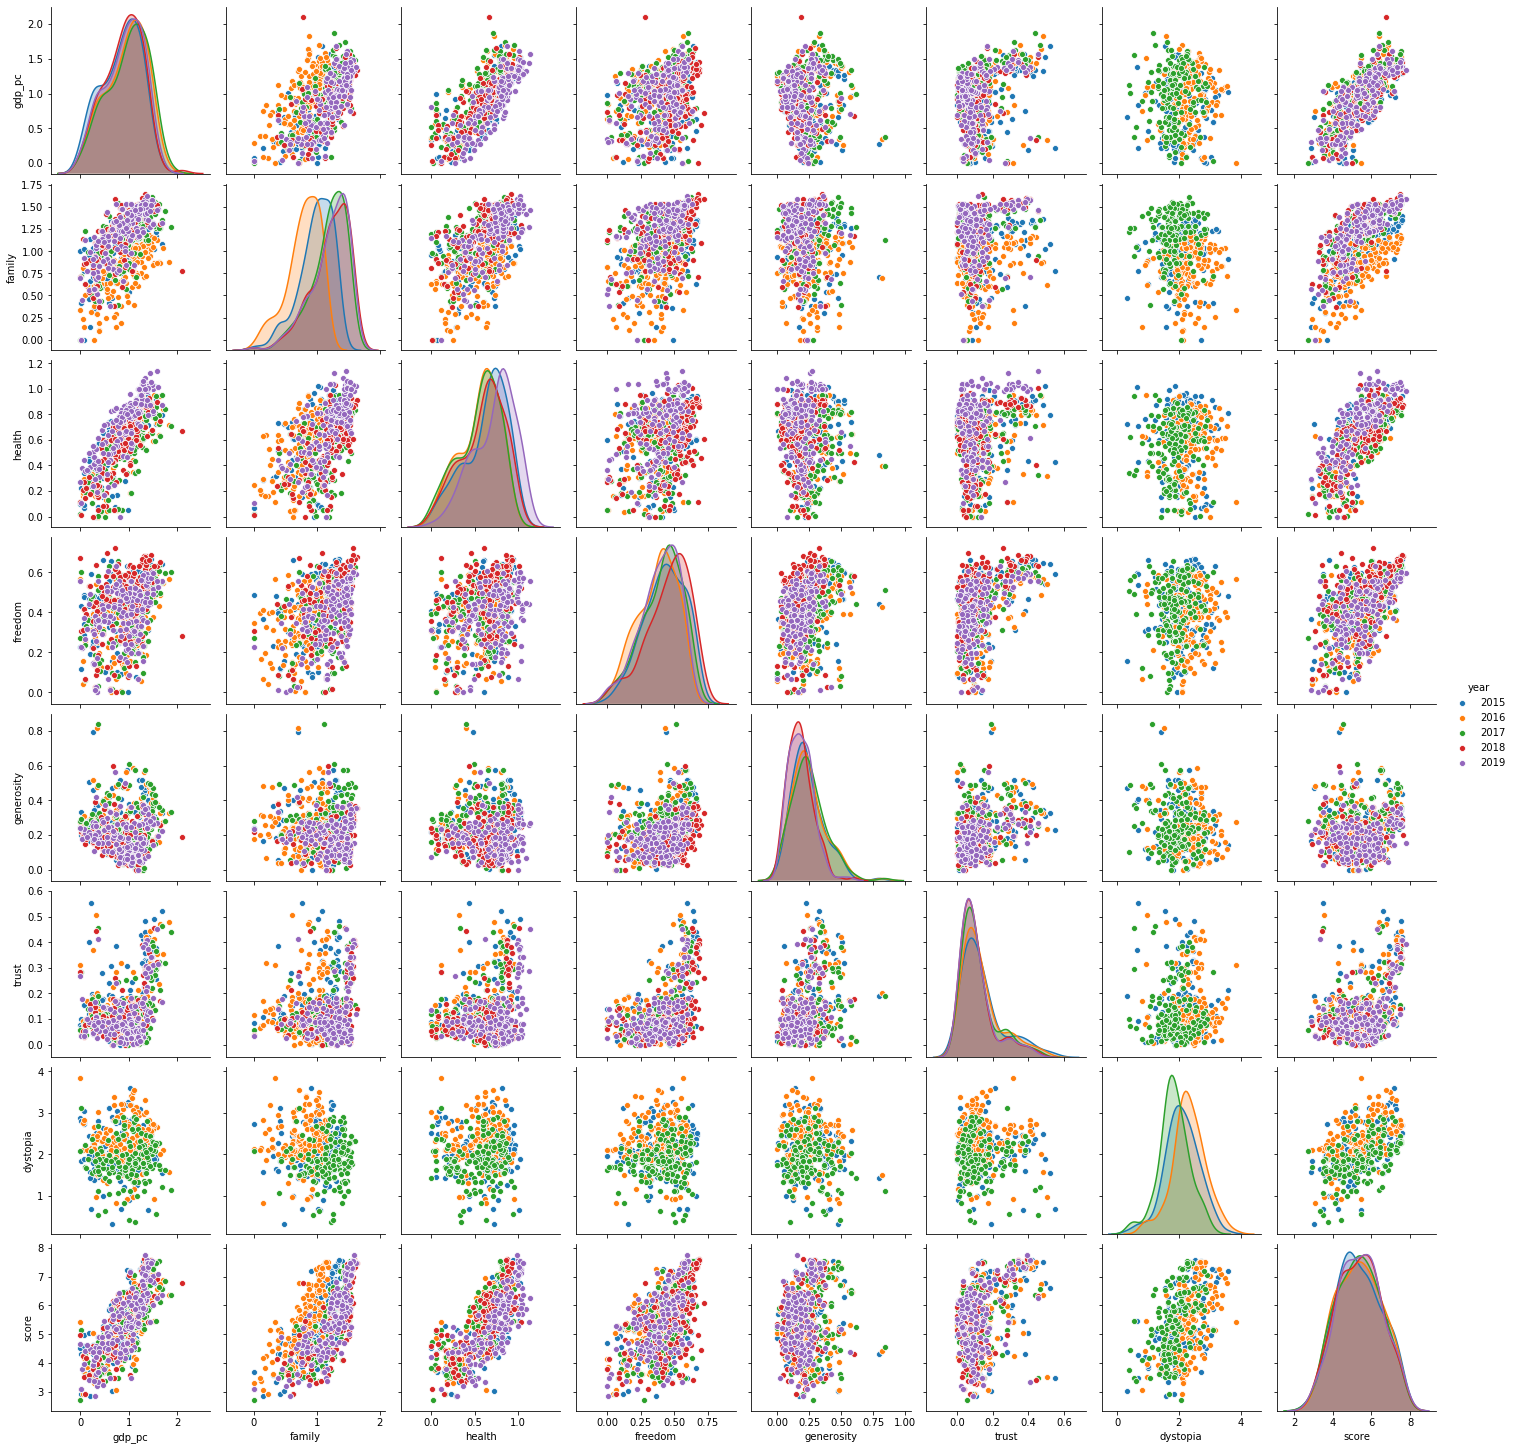

In [71]:
sns.pairplot(happy_final[features+targets+['year']], hue='year')

## 8. dimensional exploration of data

In [73]:
import statsmodels.api as sm

In [80]:
x,y

(['gdp_pc', 'family', 'health', 'freedom', 'generosity', 'trust', 'dystopia'],
 ['score'])

In [101]:
x1 = ['generosity', 'dystopia']
y1 = ['trust']

In [102]:
model = sm.OLS(happy_2016[y1], happy_2016[x1]).fit()

In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  trust   R-squared (uncentered):                   0.641
Model:                            OLS   Adj. R-squared (uncentered):              0.636
Method:                 Least Squares   F-statistic:                              138.1
Date:                Fri, 15 May 2020   Prob (F-statistic):                    3.68e-35
Time:                        17:25:58   Log-Likelihood:                          129.74
No. Observations:                 157   AIC:                                     -255.5
Df Residuals:                     155   BIC:                                     -249.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
generosity     0.2990      0.056      5.294      0.000       0.187       0.411
dystopia       0.0270      0.007      4.125      0.000       0.014       0.040
==============================================================================
Omnibus:                       35.024   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.268
Skew:                           1.173   Prob(JB):                     2.71e-12
Kurtosis:                       4.624   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 9. Discussion

In [ ]:
#1. developing countries and developed countries division

## HW 3


Using `colleg.csv` for the following questions:
### Exercise 5. Find the mean and standard deviation of math and verbal SAT score for men-only, women-only, and non gender specific universities.

### Exercise 6. Find the top 3 universities with largest numbers of undergraduate students for each state

Using `emp.csv` for the following questions:

### Exercise 7. Generate a DataFrame for the ratios of (number of employees of specific gender and race/total number of employees) for all race-gender combinations. 

### Exercise 8. Use `pd.melt()` to unpivot table `pv3` to the format of `pv4` in exampel above.

### Reading Assignment:
- More pandas functions: https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html
- Guide on merging, concatenating: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

In [19]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
college = pd.read_csv('college.csv')
college.head()

,instnm,city,stabbr,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


# Exercise 5: Find the mean and standard deviation of math and verbal SAT score for men-only, women-only, and non gender specific universities

In [24]:
#numpy.where
college['gender'].value_counts()

nongenderspecific    7060
missing               371
menonly                66
womenonly              38
Name: gender, dtype: int64

In [28]:
college['gender'] = np.where(college['menonly']==1, 'menonly', 
                             np.where(college['womenonly']==1, 'womenonly', 
                                      np.where(college['menonly'].isna(), 'missing',
                                               np.where(college['womenonly'].isna(), 'missing', 'nongenderspecific'))))

SAT1 = college.groupby('gender').agg({'satmtmid':['mean','std'], 'satvrmid':['mean', 'std']})
SAT1.head()

satmtmid              satvrmid           
                         mean        std       mean        std
gender                                                        
menonly            566.400000  56.888487  558.00000  52.497619
missing                   NaN        NaN        NaN        NaN
nongenderspecific  530.600343  73.581765  522.11342  68.497480
womenonly          531.320000  71.709321  548.40000  70.657036

In [73]:
college.tail(1)

,city,stabbr,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp,gender
instnm,,,,,,,,,,,,,,,,,,,,,,,,,,,
Excel Learning Center-San Antonio South,San Antonio,TX,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,12125,missing


# Exercise 6 | Find the top 3 universities with largest numbers of undergraduate students for each state

In [89]:
college = pd.read_csv("college.csv")
college.set_index(["instnm", "stabbr"], inplace = True, 
                            append = True, drop = True)
college.head()

,,,city,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
,instnm,stabbr,,,,,,,,,,,,,,,,,,,,,,,,,
0,Alabama A & M University,AL,Normal,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,AL,Birmingham,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,AL,Montgomery,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,AL,Huntsville,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,AL,Montgomery,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


In [95]:
#groupby
Population1 = college.groupby('stabbr')['ugds'].nlargest(3)
Population1

stabbr        instnm                                                            stabbr
AK      60    University of Alaska Anchorage                                    AK         12865.0
        62    University of Alaska Fairbanks                                    AK          5536.0
        66    Charter College-Anchorage                                         AK          3256.0
AL      5     The University of Alabama                                         AL         29851.0
        9     Auburn University                                                 AL         20514.0
        5924  Columbia Southern University                                      AL         15286.0
AR      137   University of Arkansas                                            AR         21405.0
        146   University of Central Arkansas                                    AR          9232.0
        140   Arkansas State University-Main Campus                             AR          9139.0
AS      4138  American

In [65]:
Population1.groupby(['stabbr']).mean().reset_index()

,stabbr,ugds
0,AK,7219.000000
1,AL,21883.666667
2,AR,13258.666667
3,AS,1276.000000
4,AZ,76593.000000
5,CA,37587.666667
6,CO,22943.000000
7,CT,11916.333333
8,DC,8246.000000
9,DE,10991.333333


In [48]:
#sort_value
Population2 = college.sort_values(by=['stabbr','ugds'], ascending=[True,False]).groupby('stabbr').head(3)

In [50]:
rows = Population2.index[0:]
columns = ['instnm','stabbr','ugds']
pop1 = Population2.loc[rows, columns]
pop1

,instnm,stabbr,ugds
60,University of Alaska Anchorage,AK,12865.0
62,University of Alaska Fairbanks,AK,5536.0
66,Charter College-Anchorage,AK,3256.0
5,The University of Alabama,AL,29851.0
9,Auburn University,AL,20514.0
5924,Columbia Southern University,AL,15286.0
137,University of Arkansas,AR,21405.0
146,University of Central Arkansas,AR,9232.0
140,Arkansas State University-Main Campus,AR,9139.0
4138,American Samoa Community College,AS,1276.0


In [59]:
pop2 = pop1.groupby(['stabbr']).mean()
pop2.rename(columns={'ugds':'mean_ugds'})

,mean_ugds
stabbr,
AK,7219.000000
AL,21883.666667
AR,13258.666667
AS,1276.000000
AZ,76593.000000
CA,37587.666667
CO,22943.000000
CT,11916.333333
DC,8246.000000


In [98]:
# variable missing rate
college['ugds'].isna().mean()

0.08772395487723955

In [99]:
college.shape

(7535, 25)

In [101]:
college.dropna(subset=['ugds']).shape

(6874, 25)

In [108]:
college.describe(percentiles=[.05, .25, .5, .75, .90, .95], include='all')

,city,hbcu,menonly,womenonly,relaffil,satvrmid,satmtmid,distanceonly,ugds,ugds_white,ugds_black,ugds_hisp,ugds_asian,ugds_aian,ugds_nhpi,ugds_2mor,ugds_nra,ugds_unkn,pptug_ef,curroper,pctpell,pctfloan,ug25abv,md_earn_wne_p10,grad_debt_mdn_supp
count,7535,7164.000000,7164.000000,7164.000000,7535.000000,1185.000000,1196.000000,7164.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6853.000000,7535.000000,6849.000000,6849.000000,6718.000000,6413,7503
unique,2514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598,2038
top,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PrivacySuppressed,PrivacySuppressed
freq,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,822,1510
mean,NaN,0.014238,0.009213,0.005304,0.190975,522.819409,530.765050,0.005583,2356.837940,0.510207,0.189997,0.161635,0.033544,0.013813,0.004569,0.023950,0.016086,0.045181,0.226639,0.923291,0.530643,0.522211,0.410021,NaN,NaN
std,NaN,0.118478,0.095546,0.072642,0.393096,68.578862,73.469767,0.074519,5474.275871,0.286958,0.224587,0.221854,0.073777,0.070196,0.033125,0.031288,0.050172,0.093440,0.246470,0.266146,0.225544,0.283616,0.228939,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,290.000000,310.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
5%,NaN,0.000000,0.000000,0.000000,0.000000,430.000000,430.000000,0.000000,31.650000,0.013265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.037400,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,475.000000,482.000000,0.000000,117.000000,0.267500,0.036125,0.027600,0.002500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.357800,0.332900,0.241500,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,510.000000,520.000000,0.000000,412.500000,0.555700,0.100050,0.071400,0.012900,0.002600,0.000000,0.017500,0.000000,0.014300,0.150400,1.000000,0.521500,0.583300,0.400750,NaN,NaN


In [167]:
college.dropna(subset=['satmtmid']).shape
college['satmtmid'].value_counts()/college['satmtmid'].shape[0]

490.0    0.006238
520.0    0.005707
500.0    0.005574
480.0    0.005043
485.0    0.004778
505.0    0.004645
510.0    0.004645
525.0    0.004512
495.0    0.004380
515.0    0.004380
475.0    0.004247
530.0    0.003849
540.0    0.003849
545.0    0.003716
470.0    0.003583
460.0    0.003451
550.0    0.003318
465.0    0.003052
555.0    0.002920
565.0    0.002920
580.0    0.002787
535.0    0.002787
560.0    0.002389
575.0    0.002256
595.0    0.002123
450.0    0.002123
570.0    0.001991
585.0    0.001991
455.0    0.001858
620.0    0.001858
600.0    0.001725
430.0    0.001593
590.0    0.001460
435.0    0.001327
445.0    0.001327
615.0    0.001327
440.0    0.001327
420.0    0.001194
605.0    0.001194
670.0    0.001062
625.0    0.001062
710.0    0.001062
725.0    0.001062
630.0    0.000929
640.0    0.000929
415.0    0.000929
610.0    0.000796
665.0    0.000796
395.0    0.000796
745.0    0.000664
645.0    0.000664
650.0    0.000664
660.0    0.000664
685.0    0.000664
675.0    0.000664
425.0    0

In [246]:
satmath = college['satmtmid'].value_counts()
satmath = satmath.to_frame()
satmath

,satmtmid
490.0,47
520.0,43
500.0,42
480.0,38
485.0,36
505.0,35
510.0,35
525.0,34
495.0,33
515.0,33


In [226]:
satmath.rename(columns={'satmtmid':'f_satmath'})
sat22 = satmath.reset_index()
sat33 = sat22.rename(columns={'index':'sat', 'satmtmid':'f_satmath'})

In [228]:
sat33.min()

sat          310.0
f_satmath      1.0
dtype: float64

In [222]:
sat33.max()

index       785.0
satmtmid     47.0
dtype: float64

In [255]:
sat33['satrange'] = pd.cut(sat33['sat'], [310, 400, 500, 600, 700, 785], labels=[310, 400, 500, 
                                                                                 600, 700], right=False)
sat33

,sat,f_satmath,satrange
0,490.0,47,400
1,520.0,43,500
2,500.0,42,500
3,480.0,38,400
4,485.0,36,400
5,505.0,35,500
6,510.0,35,500
7,525.0,34,500
8,495.0,33,400
9,515.0,33,500


In [284]:
sat44 = sat33.groupby(['satrange']).sum()
sat55 = sat44['f_satmath']
sat55 = sat55.to_frame()
sat55 = sat55.reset_index

In [285]:
sat55()

,satrange,f_satmath
0,310,17
1,400,418
2,500,573
3,600,140
4,700,47


In [286]:
import math

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequence')

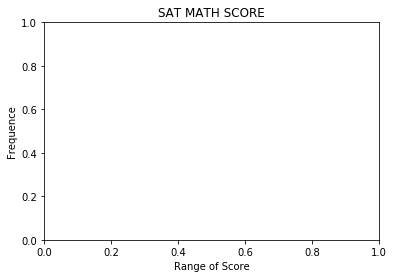

In [291]:
plt.title('SAT MATH SCORE')
plt.xlabel('Range of Score')
plt.ylabel('Frequence')

# Exercise 7 | Generate a DataFrame for the ratios of (number of employees of specific gender and race/total number of employees) for all race-gender combinations. 

In [301]:
emp = pd.read_csv('employee.csv')

In [302]:
emp

,title,dept,salary,race,gender,hire_date
0,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03
1,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08
2,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black,Male,1984-11-26
3,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian,Male,2012-03-26
4,CARPENTER,Houston Airport System (HAS),42390.0,White,Male,2013-11-04
...,...,...,...,...,...,...
1648,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Male,2014-06-09
1649,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black,Male,2003-09-02
1650,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Male,2014-10-13
1651,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian,Male,2009-01-20


In [379]:
pv3 = pd.crosstab(index=emp['gender'], columns=emp['race'], normalize = 'all').round(3)
pv3

race,Asian,Black,Hispanic,Native American,White
gender,,,,,
Female,0.011,0.132,0.062,0.002,0.048
Male,0.043,0.200,0.180,0.002,0.320


??????for the following part?????? how to switch back from stack

In [312]:
func = lambda x: x.count()/emp.shape[0]
pivot1 = emp.pivot_table(index='gender', columns='race', aggfunc=func).round(3)
pivot1

dept                                        hire_date         \
race    Asian  Black Hispanic Native American  White     Asian  Black   
gender                                                                  
Female  0.011  0.131    0.061           0.002  0.047     0.011  0.131   
Male    0.042  0.197    0.178           0.002  0.316     0.042  0.197   

                                       salary                                  \
race   Hispanic Native American  White  Asian  Black Hispanic Native American   
gender                                                                          
Female    0.061           0.002  0.047  0.011  0.125     0.06           0.002   
Male      0.178           0.002  0.316  0.042  0.188     0.17           0.002   

               title                                         
race    White  Asian  Black Hispanic Native American  White  
gender                                                       
Female  0.044  0.011  0.131    0.061           0.002  0.047  
Male    0.284  0.042  0.197    0.178           0.002  0.316

In [334]:
col = ['gender', 'race', 'dept']
pivot2 = pivot1.stack().reset_index()
pivot3 = pivot2[col]
pivot3


,gender,race,dept
0,Female,Asian,0.011
1,Female,Black,0.131
2,Female,Hispanic,0.061
3,Female,Native American,0.002
4,Female,White,0.047
5,Male,Asian,0.042
6,Male,Black,0.197
7,Male,Hispanic,0.178
8,Male,Native American,0.002
9,Male,White,0.316


In [327]:
piv1 = emp.groupby(['gender', 'race']).agg({lambda x: x.count()/emp.shape[0]}).round(3)

In [358]:
piv2 = piv1.stack().reset_index()
piv3 = piv2[col]
piv3

,gender,race,dept
0,Female,Asian,0.011
1,Female,Black,0.131
2,Female,Hispanic,0.061
3,Female,Native American,0.002
4,Female,White,0.047
5,Male,Asian,0.042
6,Male,Black,0.197
7,Male,Hispanic,0.178
8,Male,Native American,0.002
9,Male,White,0.316


# Exercise 8 | Use `pd.melt()` to unpivot table `pv3` to the format of `pv4` in exampel above.

In [380]:
pv3

race,Asian,Black,Hispanic,Native American,White
gender,,,,,
Female,0.011,0.132,0.062,0.002,0.048
Male,0.043,0.200,0.180,0.002,0.320


In [381]:
pv3 = pv3.reset_index()
pv3 

race,gender,Asian,Black,Hispanic,Native American,White
0,Female,0.011,0.132,0.062,0.002,0.048
1,Male,0.043,0.200,0.180,0.002,0.320


In [382]:
pv4 = pv3.melt(id_vars='gender', value_vars=['Asian','Black','Hispanic','Native American','White'])
pv4

,gender,race,value
0,Female,Asian,0.011
1,Male,Asian,0.043
2,Female,Black,0.132
3,Male,Black,0.200
4,Female,Hispanic,0.062
5,Male,Hispanic,0.180
6,Female,Native American,0.002
7,Male,Native American,0.002
8,Female,White,0.048
9,Male,White,0.320


In [372]:
pv5 = pv4.unstack(level=1)
pv5.unstack()

,0,1,2,3,4,5,6,7,8,9
gender,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male
race,Asian,Asian,Black,Black,Hispanic,Hispanic,Native American,Native American,White,White
value,58000,61000,48000,52000,44000,55000,59000,69000,66000,63000


In [420]:
pv4.T

,0,1,2,3,4,5,6,7,8,9
gender,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male
race,Asian,Asian,Black,Black,Hispanic,Hispanic,Native American,Native American,White,White
value,0.011,0.043,0.132,0.2,0.062,0.18,0.002,0.002,0.048,0.32


In [ ]:
#how to change from pv4 to pv3